In [1]:
import sys
import os
import json
import glob
import h5py

import numpy as np
import scipy.signal
import scipy.io.wavfile
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

sys.path.append('/om2/user/msaddler/pitchnet/assets_psychophysics')
import util_figures
import util_figures_stimuli
sys.path.append('/om2/user/msaddler/pitchnet/assets_datasets')
import util_stimuli

import bez2018model


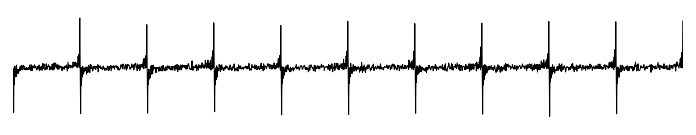

In [2]:
sr = 32000
t = np.arange(0, 0.050, 1/sr)
signal = np.zeros_like(t)
noise = np.random.randn(signal.shape[0])
f0 = 200

for freq in np.arange(f0, sr/2, f0):
    signal = signal + np.sin(2*np.pi*freq*t)

snr = 10
dBSPL = 60
noise = np.random.randn(noise.shape[0])

y = util_stimuli.combine_signal_and_noise(signal, noise, snr=snr,
                                          rms_out=20e-6*np.power(10, dBSPL/20))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 2))
ax = util_figures_stimuli.figure_wrapper_nervegram_stimulus(ax,
                                                            ax_idx_nervegram=None,
                                                            ax_idx_spectrum=None,
                                                            ax_idx_excitation=None,
                                                            ax_idx_waveform=0,
                                                            waveform=y,
                                                            waveform_sr=sr)
plt.show()

ipd.display(ipd.Audio(y, rate=sr))


In [3]:
kwargs_nervegram_meanrates = {
    'meanrates_params': {
        'dur': 0.050,
        'fs': 20e3,
        'buffer_start_dur': 0.0,
        'buffer_end_dur': 0.0,
    },
    'ANmodel_params': {
        'num_cfs': 100,
        'min_cf': 125,
        'max_cf': 14e3,
        'spont_list': [70],
        'cohc': 1.0,
        'bandwidth_scale_factor': 1.0,
        'IhcLowPass_cutoff': 3000.0,
        'IhcLowPass_order': 7,
    },
}

out_dict = bez2018model.nervegram_meanrates(y, sr, **kwargs_nervegram_meanrates)


In [4]:
for k in sorted(out_dict.keys()):
    print(k, np.array(out_dict[k]).shape)


IhcLowPass_cutoff ()
IhcLowPass_order ()
bandwidth_scale_factor ()
buffer_end_dur ()
buffer_start_dur ()
cf_list (100,)
cihc ()
cohc ()
implnt ()
meanrates (100, 1000, 1)
meanrates_dur ()
meanrates_fs ()
noiseType ()
pin (5000,)
pin_dBSPL ()
pin_dBSPL_flag ()
pin_fs ()
signal (1600,)
signal_fs ()
species ()
spont_list (1,)
tabs ()
trel ()


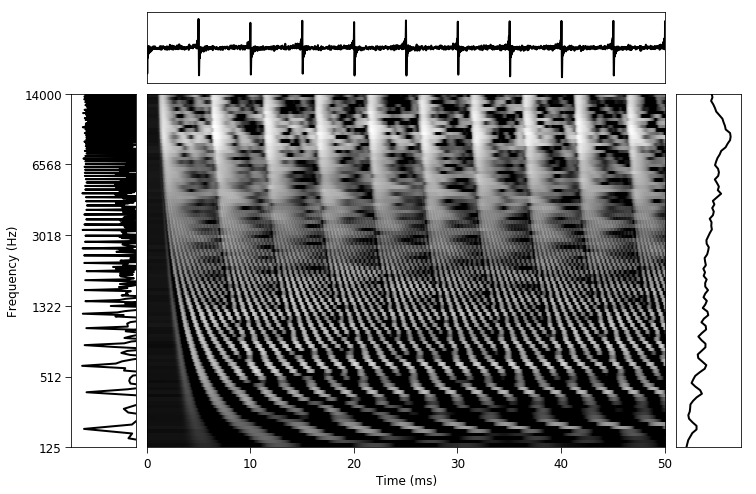

In [5]:
figsize=(12, 8)
nrows=2
ncols=3
gridspec_kw = {
    'wspace': 0.05,
    'hspace': 0.05,
    'width_ratios': [1, 8, 1],
    'height_ratios': [1, 5],
}
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)

util_figures_stimuli.figure_wrapper_nervegram_stimulus(ax_arr,
    ax_idx_nervegram=4,
    ax_idx_spectrum=3,
    ax_idx_excitation=5,
    ax_idx_waveform=1,
    nervegram=out_dict['meanrates'],
    nervegram_sr=out_dict['meanrates_fs'],
    waveform=out_dict['pin'],
    waveform_sr=out_dict['pin_fs'],
    cfs=out_dict['cf_list'],
    fontsize_title=12,
    fontsize_labels=12,
    fontsize_legend=12,
    fontsize_ticks=12,
    fontweight_labels=None,
    plot_kwargs={'lw':2},
    limits_buffer=0.2,
    nxticks=6, 
    nyticks=6,
    spines_to_hide_spectrum=[],
    spines_to_hide_excitation=[],
    spines_to_hide_waveform=[])#['top', 'bottom', 'left', 'right'])

plt.show()


In [ ]:
figsize = (12, 6)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
ax = util_figures_stimuli.make_nervegram_plot(ax, out_dict['meanrates'],
                                              sr=out_dict['meanrates_fs'],
                                              cfs=out_dict['cf_list'],
                                              str_xlabel='Time (ms)',
                                              str_ylabel='Characteristic Frequency (Hz)',
                                              str_clabel='ANF Firing Rate (Hz)')
plt.show()


In [ ]:
sr = 32000
t = np.arange(0, 0.100, 1/sr)

f1 = 500 # Probe
f2 = 600 # Suppressor
y1 = util_stimuli.set_dBSPL(np.sin(2*np.pi*f1*t + 2*np.pi * np.random.rand()), 60)
y2 = util_stimuli.set_dBSPL(np.sin(2*np.pi*f2*t + 2*np.pi * np.random.rand()), 60)
y = y1 + y2

for waveform in [y1, y2, y]:
    ipd.display(ipd.Audio(waveform, rate=sr))
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 2))
    ax = util_figures_stimuli.figure_wrapper_nervegram_stimulus(ax,
                                                                ax_idx_nervegram=None,
                                                                ax_idx_spectrum=None,
                                                                ax_idx_excitation=None,
                                                                ax_idx_waveform=0,
                                                                waveform=waveform,
                                                                waveform_sr=sr)
    plt.show()


In [ ]:
kwargs_nervegram_meanrates = {
    'meanrates_params': {
        'dur': 0.050,
        'fs': 20e3,
        'buffer_start_dur': 0.03,
        'buffer_end_dur': 0.01,
    },
    'ANmodel_params': {
        'num_cfs': 100,
        'min_cf': 125,
        'max_cf': 14e3,
        'spont_list': [70],
        'cohc': 1.0,
        'bandwidth_scale_factor': 1.0,
        'IhcLowPass_cutoff': 3000.0,
        'IhcLowPass_order': 7,
    },
}

out_dict_y1 = bez2018model.nervegram_meanrates(y1, sr, **kwargs_nervegram_meanrates)
out_dict_y = bez2018model.nervegram_meanrates(y, sr, **kwargs_nervegram_meanrates)


In [ ]:
figsize=(12, 8)
nrows=2
ncols=3
gridspec_kw = {
    'wspace': 0.05,
    'hspace': 0.05,
    'width_ratios': [1, 8, 1],
    'height_ratios': [1, 5],
}

for out_dict in [out_dict_y1, out_dict_y]:

    fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)

    util_figures_stimuli.figure_wrapper_nervegram_stimulus(ax_arr,
        ax_idx_nervegram=4,
        ax_idx_spectrum=3,
        ax_idx_excitation=5,
        ax_idx_waveform=1,
        nervegram=out_dict['meanrates'],
        nervegram_sr=out_dict['meanrates_fs'],
        waveform=out_dict['pin'],
        waveform_sr=out_dict['pin_fs'],
        cfs=out_dict['cf_list'],
        plot_kwargs={'lw':2},
        limits_buffer=0.2,
        nxticks=6, 
        nyticks=6,
        spines_to_hide_spectrum=[],
        spines_to_hide_excitation=[],
        spines_to_hide_waveform=[])#['top', 'bottom', 'left', 'right'])

    plt.show()

In [ ]:

fig, ax_arr = plt.subplots(nrows=1, ncols=1, figsize=(6, 8))

color_list = ['k', 'r']
for cidx, out_dict in enumerate([out_dict_y1, out_dict_y]):
    util_figures_stimuli.figure_wrapper_nervegram_stimulus(ax_arr,
        ax_idx_nervegram=None,
        ax_idx_spectrum=None,
        ax_idx_excitation=0,
        ax_idx_waveform=None,
        nervegram=out_dict['meanrates'],
        nervegram_sr=out_dict['meanrates_fs'],
        waveform=out_dict['pin'],
        waveform_sr=out_dict['pin_fs'],
        cfs=out_dict['cf_list'],
        plot_kwargs={'lw':2, 'color': color_list[cidx]},
        limits_buffer=0.2,
        nxticks=6, 
        nyticks=6,
        spines_to_hide_spectrum=[],
        spines_to_hide_excitation=[],
        spines_to_hide_waveform=[])#['top', 'bottom', 'left', 'right'])

xticks = np.arange(0, 701, 100)
ax_arr.set_xticks(xticks)
ax_arr.set_xticklabels(xticks)
ax_arr.set_xlim([xticks[0], xticks[-1]])
ax_arr.set_xlabel('Mean firing rate (Hz)')
ax_arr.set_ylabel('Auditory nerve fibers')
plt.show()
